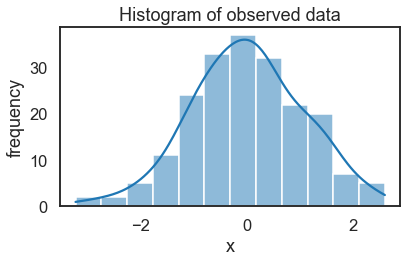

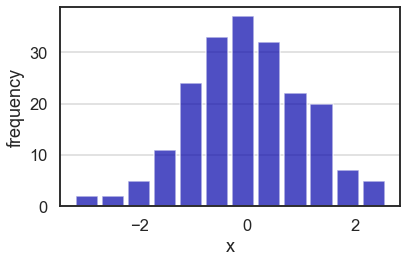

[5.97557326e-44 1.90580283e-40 4.34858840e-37 7.09889221e-34
 8.29095970e-31 6.92773027e-28 4.14141813e-25 1.77124702e-22
 5.41977342e-20 1.18646538e-17 1.85823637e-15 2.08218246e-13
 1.66920068e-11 9.57348958e-10 3.92829349e-08 1.15321300e-06
 2.42207215e-05 3.63945676e-04 3.91253285e-03 3.00920222e-02
 1.65583361e-01 6.51859437e-01 1.83595979e+00 3.69951093e+00
 5.33331714e+00 5.50075684e+00 4.05900353e+00 2.14283314e+00
 8.09336678e-01 2.18696602e-01 4.22792029e-02 5.84767853e-03
 5.78644904e-04 4.09649774e-05 2.07484305e-06 7.51847437e-08
 1.94915394e-09 3.61521809e-11 4.79727712e-13 4.55435683e-15
 3.09336556e-17 1.50316751e-19 5.22583220e-22 1.29979686e-24
 2.31295641e-27 2.94463425e-30 2.68205211e-33 1.74773269e-36
 8.14806995e-40 2.71773078e-43]


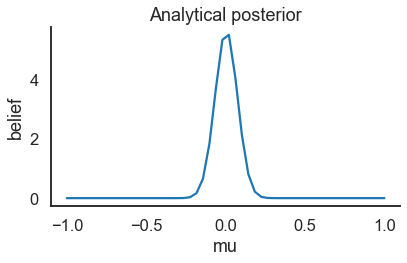

<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)

data = np.random.randn(200)

# Histogram using seaborn (sns)
ax = plt.subplot()
sns.histplot(data, kde=True, ax=ax) # smooth using KDE: https://en.wikipedia.org/wiki/Kernel_density_estimation
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='frequency');
plt.tight_layout()
plt.savefig('figures/histo_seaborn.png')
plt.show()
plt.clf()

# Plot using matplotlib
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('x')
plt.ylabel('frequency')
plt.tight_layout()
plt.savefig('figures/histo_matplotlib.png')
plt.show()
plt.clf()

def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

ax = plt.subplot()
x = np.linspace(-1, 1, 50)

posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
print(posterior_analytical)

ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()
plt.tight_layout()
plt.savefig('figures/histo_analytical.png')
plt.show()
plt.clf()